In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Classification/K-NeirestNeighbour(KNN)/data/data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


* m= iyi huylu tumor
* b= kotu huylu tumor
* radius_mean= tumorun yarıcapı
* texture_mean= tumorun dokusu
* area_mean= tumorun alanı

- işimize yaramayan id ve Unnamed: 32 'yi drop edeceğiz.

In [4]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)

In [5]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]

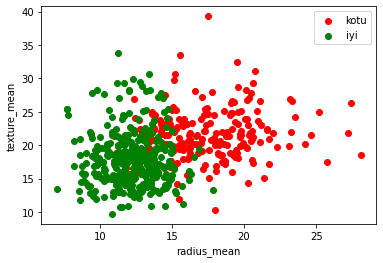

In [6]:
plt.scatter(M.radius_mean, M.texture_mean, color="red", label = "kotu")
plt.scatter(B.radius_mean, B.texture_mean, color="green", label = "iyi")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

* K neirest neigbour algoritması:
- 1) K değerini seç.
- 2) K en yakın data noktalarını bul.
- 3) K en yakın komşu arasında hangi classtan kaç tane var hesapla.
- 4) Test ettiğimiz point ya da data hangi classa ait tespit et. 

- en yakın komşuları bulurken öklid distance kullanılır:
karekök((x2-x1)^2+(y2-y1)^2)

- KNN'de normalizasyon cok onemlidir.

In [7]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values  
x_data=data.drop(["diagnosis"],axis=1)

- class label'larımızı string olarak istemiyoruz ya kategorik ya da int olması gerekiyor o yüzden M ve B degerlerini degistirdik.
- y = label/etiketim
- x = verilerim

In [8]:
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [9]:
#train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)


In [10]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

In [11]:
prediction

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

- kaç tanesini doğru tahmin edebildik bakmak icin dogruluga bakacagiz:

In [12]:
print("{} nn score: {}".format(3,knn.score(x_test , y_test)))

3 nn score: 0.9707602339181286


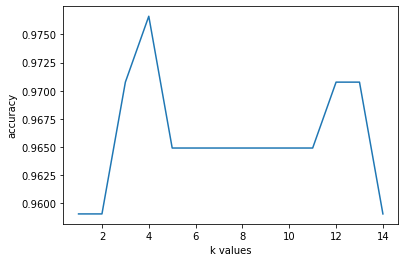

In [13]:
#find optimum k value:
score_list=[]
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test,y_test))
plt.plot(range(1,15),score_list) #x eksenini 1'den 15'e kadar yaptık
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [19]:
#knn model for 4
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors=4)
knn3.fit(x_train,y_train)
knn3.predict(x_test)
print("{} nn score: {}".format(4,knn.score(x_test , y_test)))

4 nn score: 0.9707602339181286
